<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## 

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [791]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Check the number of rows and columns.

In [197]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [198]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [199]:
movies['duration'].mean()

120.97957099080695

The average duration time for all the movies is 121 mins

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [200]:
movies['duration'].sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

The shortest movie is 46 mins and the longest one is 242 mins!

#### Create a histogram of duration, choosing an "appropriate" number of bins.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


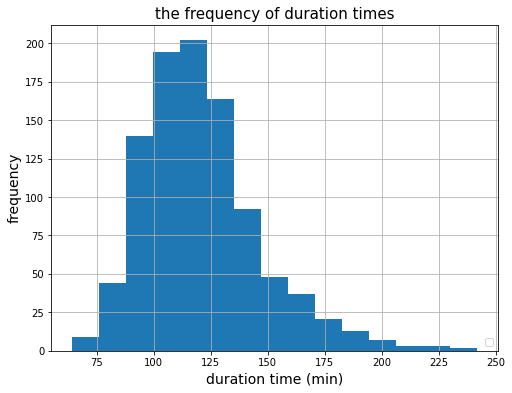

In [831]:
movies['duration'].hist(bins=15, figsize=(8,6))
plt.xlabel('duration time (min)',fontsize=14);
plt.ylabel('frequency',fontsize=14);
plt.title('the frequency of duration times', fontsize=15, y=1);
plt.legend(loc=4);

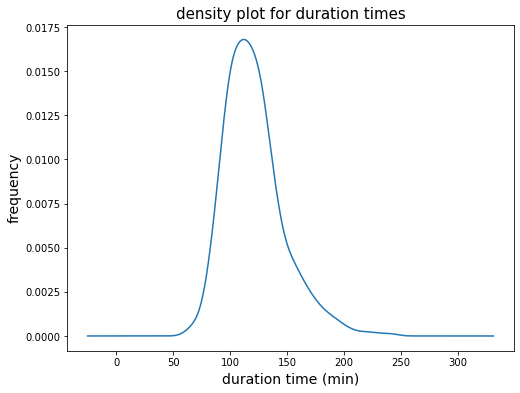

In [828]:
movies['duration'].plot(kind='density',figsize=(8,6));
plt.xlabel('duration time (min)',fontsize=14);
plt.ylabel('frequency',fontsize=14);
plt.title('density plot for duration times', fontsize=15, y=1);

The histogram chart of the duration time for movies shows the movies with duration times in the range of 100 to 120 (min) make the largest groups, Fig.1.

#### Use a box plot to display that same data.

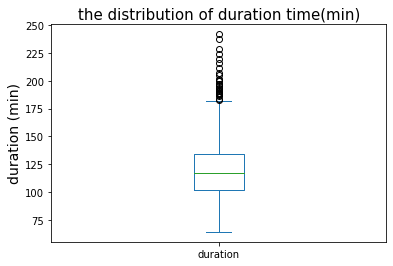

In [775]:
movies['duration'].plot(kind='box')
plt.title('the distribution of duration time(min)', fontsize=15, y=1);
plt.ylabel('duration (min)',fontsize=14);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [203]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

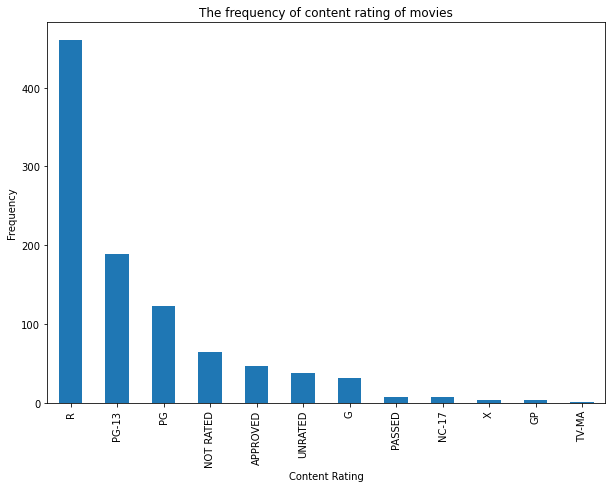

In [204]:
movies['content_rating'].value_counts().plot(kind='bar',figsize=(10,7))
plt.xlabel('Content Rating');
plt.ylabel('Frequency');
plt.title('The frequency of content rating of movies');

The bar chart shows movies with inappropriate content for younger children take around 70% of the industry market!

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [292]:
movies[movies['content_rating'].isin(['PASSED','NOT RATED','APPROVED','GP'])]  # getting a view of those rows having the mentioned 
                                                                               #strings in the content rating!

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
...,...,...,...,...,...,...
827,7.5,The Wind That Shakes the Barley,NOT RATED,Drama,127,"[u'Cillian Murphy', u'Padraic Delaney', u'Liam..."
844,7.5,Pinocchio,APPROVED,Animation,88,"[u'Dickie Jones', u'Christian Rub', u'Mel Blanc']"
866,7.5,To Catch a Thief,APPROVED,Mystery,106,"[u'Cary Grant', u'Grace Kelly', u'Jessie Royce..."
896,7.5,From Russia with Love,APPROVED,Action,115,"[u'Sean Connery', u'Robert Shaw', u'Lotte Lenya']"


In [293]:
movies.loc[movies['content_rating'].isin(['PASSED','NOT RATED','APPROVED','GP']), 'content_rating']='UNRATED'
movies.loc[[5,6,22],'content_rating']  # just for testing if it works!


5     UNRATED
6     UNRATED
22    UNRATED
Name: content_rating, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [289]:
movies[movies['content_rating'].isin(['X','TV-MA'])] # just for having a rough estimation of how many 'X' and 'TV-MA' 
                                                     #elements... and their address!

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
219,8.1,Who's Afraid of Virginia Woolf?,TV-MA,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo..."
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
486,7.8,Evil Dead II,X,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
913,7.5,Suspiria,X,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."


In [759]:
movies.loc[movies['content_rating'].isin(['X','TV-MA']), 'content_rating']='NC-17'
#movies.loc[86,'content_rating']     #just for testing if the command worked!

#### Count the number of missing values in each column.

In [207]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

There are only 3 movies with missing values in the content_rating column

In [208]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [218]:
movies[movies['content_rating'].isnull()]



,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [219]:
movies['content_rating'].fillna(value='reasonable', inplace=True)

In [784]:
movies.loc[[187,649,936],'content_rating']

187     G
649    PG
936    PG
Name: content_rating, dtype: object

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [792]:
mask1=movies['duration']<120
below2hrs_movies=movies[mask1]
below2hrs_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."


In [793]:
below2hrs_movies['star_rating'].mean()

7.838666666666657

In [794]:
mask2=movies['duration']>120
over2hrs_movies=movies[mask2]
over2hrs_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [795]:
over2hrs_movies['star_rating'].mean()

7.953669724770622

There is no significant difference between the average star_rating for movies longer thatn 2 hours (7.95) and shorter than 2 hours (7.84), indicating the star_rating does not depend on the duration significantly

#### Use a visualization to detect whether there is a relationship between duration and star rating.

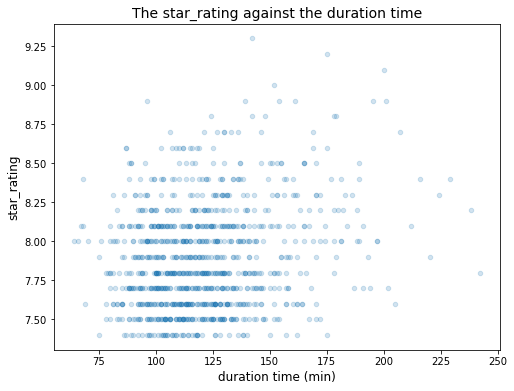

In [804]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2, figsize=(8,6))
plt.xlabel('duration time (min)', fontsize=(12));
plt.ylabel('star_rating', fontsize=(12));
plt.title('The star_rating against the duration time', fontsize=(14));

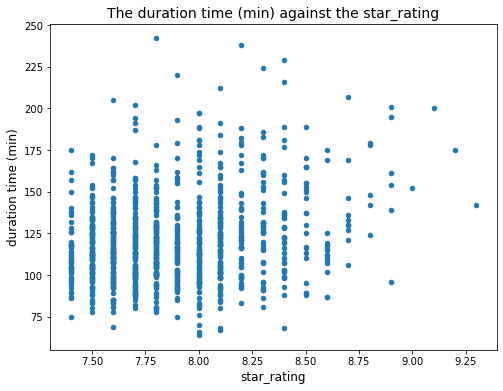

In [807]:
movies.plot(kind='scatter', x='star_rating', y='duration',figsize=(8,6))
plt.xlabel('star_rating', fontsize=(12));
plt.ylabel('duration time (min)', fontsize=(12));
plt.title('The duration time (min) against the star_rating', fontsize=(14));

In [225]:
movies['duration']=movies.duration*60
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152.0,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [226]:
groupedby_starating=movies.groupby('star_rating',as_index=False).mean()

In [227]:
groupedby_starating.head()

,star_rating,duration
0,7.4,113.530612
1,7.5,116.194444
2,7.6,117.322581
3,7.7,118.265487
4,7.8,118.767241


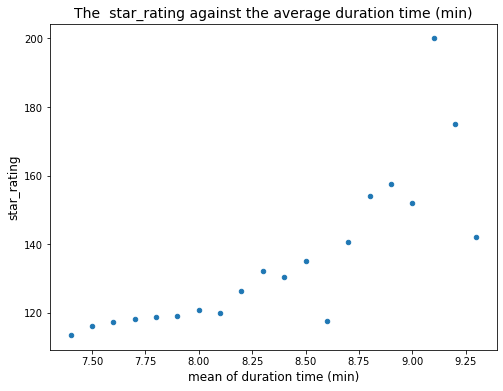

In [832]:
groupedby_starating.plot(kind='scatter', x='star_rating', y='duration',figsize=(8,6))
plt.xlabel('mean of duration time (min)', fontsize=(12));
plt.ylabel('star_rating', fontsize=(12));
plt.title('The  star_rating against the average duration time (min)', fontsize=(14));

The scatter plot of the star_rating against the average duaration time together with the scatter plots of duration times against star_rating and star_rating against duration times show that by increasing the duration time the star_rating increases though the number of rated movies decreases. This can be explained with the fact that the longer movies are more classic and artifact and probably made with greater directors not just for the box office! So the film watchers are mostly from the cinema lovers and reviewers and give a higher star rate to these kinds of movies. This could be more investigated by improving the data ; providing the production date and directors name for each movie.

#### Calculate the average duration for each genre.

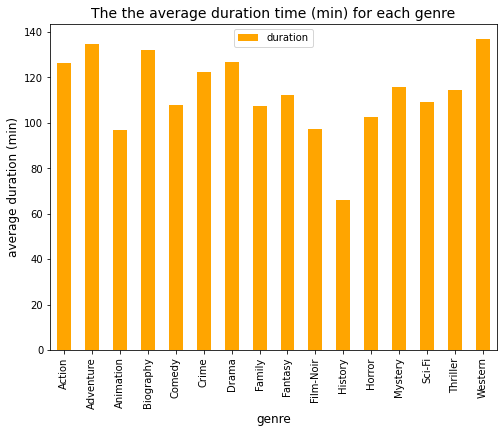

In [833]:
movies.groupby('genre',as_index=False)['duration'].mean().plot(kind='bar', x='genre', y='duration', figsize=(8,6), color='orange')
plt.xlabel('genre', fontsize=(12));
plt.ylabel('average duration (min)', fontsize=(12));
plt.title('The the average duration time (min) for each genre', fontsize=(14));

The bar chart shows that western movies have the longest durations in average. Adventures and biography movies also have very long durations in average. The shortest duration belongs to history movies.

## Advanced level

#### Visualize the relationship between content rating and duration.

In [826]:
meandurationgp_contentrating=movies.groupby('content_rating',as_index=False).duration.mean()
meandurationgp_contentrating


,content_rating,duration
0,APPROVED,113.914894
1,G,112.343750
2,GP,135.666667
3,NC-17,119.857143
4,NOT RATED,122.661538
5,PASSED,104.285714
6,PG,115.300813
7,PG-13,127.195767
8,R,122.163043
9,TV-MA,131.000000


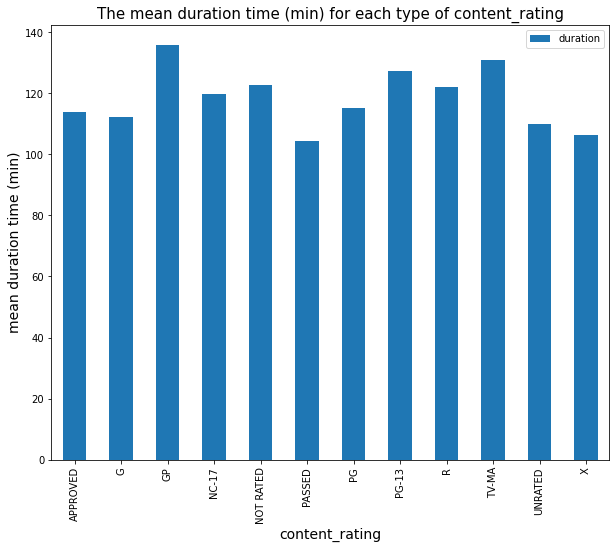

In [838]:
meandurationgp_contentrating.plot(kind='bar', x='content_rating', y='duration',figsize=(10,8))
plt.xlabel('content_rating', fontsize=(14));
plt.ylabel('mean duration time (min)', fontsize=(14));
plt.title('The mean duration time (min) for each type of content_rating', fontsize=(15));

the average duration for various content ratings of the movies are compared. The results shows the PG-13 movies(Parents Strongly Cautioned) hadslightly greater duration in average

#### Determine the top rated movie (by star rating) for each genre.

In [344]:
movies.loc[movies.groupby('genre')['star_rating'].idxmax()]


,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [345]:
movies[movies['title'].duplicated(keep=False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [516]:
len(movies.index)

979

In [650]:
movies.groupby('genre',as_index=False).star_rating.mean()  # just to get a view of the genres list 

,genre,star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Family,7.850000
8,Fantasy,7.700000
9,Film-Noir,8.033333


In [431]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [488]:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Drama', 'Family', 'Fantasy', 'Film-Noir',
             'History', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller', 'Western']

In [557]:
ls_of_genres=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Drama', 'Family', 'Fantasy', 'Film-Noir',
             'History', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller', 'Western']
len_of_df=len(movies.index)
w=dict()
for x in ls_of_genres:
    u=[]
    for i in range(len_of_df):
        if movies.loc[i,'genre']==x:        #puts a condition on each row of genre's column
            n=movies.loc[i,'star_rating']
            u.append(n)
    if len(u)>=10:
        starating_avg= sum(u)/len(u)         # makes a dicitonary and converts the list to a data fram
        w[x]=starating_avg
df=pd.DataFrame.from_dict(w, orient='index',columns=['mean of star_rating'])
df.index.name='genre'
df

,mean of star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [657]:
df_count=movies['genre'].value_counts().reset_index()    #this makes a data frame of the the generes and counts them 
df_count.columns=['genre', 'count']
df_mean=movies.groupby('genre',as_index=False).star_rating.mean()   #groups the genre column based on the genres and calculates 
                                                                    #the mean value of star rating for each of them!
df_count.loc[df_count['count'] >= 10, 'mean value'] = df_mean.loc[:,'star_rating']  # it assigns the mean valu of the star_rating for the 
                                                                                    #generes with number of counts les thatn 10 
df_count.dropna().loc[:,['genre', 'mean value']]

,genre,mean value
0,Drama,7.884559
1,Comedy,7.933333
2,Action,7.914516
3,Crime,7.862338
4,Biography,7.822436
5,Adventure,7.916935
6,Animation,7.902518
7,Horror,7.850000
8,Mystery,7.700000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [566]:
genre_gp=movies.groupby('genre')['star_rating'].mean()
genres_10=movies['genre'].value_counts()>10
genre_gp[genres_10].to_frame()


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [547]:
x=movies.groupby('genre',as_index=False)['star_rating'].agg(['count', 'mean'])
x[x['count']>10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


The averae star rating does not shows any significant difference for various generes!

## Bonus

#### Figure out something "interesting" using the actors data!

In [763]:
movies['star_rating'].mean()

7.8897854954034985

In [765]:
movies['star_rating'].min()

7.4

In [695]:
movies.loc[2,'actors_list'].str.contains('Marlon Brando')

1       True
2      False
3      False
4      False
5      False
       ...  
974    False
975    False
976    False
977    False
978    False
Name: actors_list, Length: 978, dtype: bool

                  star_rating          
                         mean  min  max
actor_name                             
Al Pacino            8.107692  7.5  9.2
Anthony Hopkins      7.933333  7.5  8.6
Brad Pitt            7.921429  7.5  8.9
Clint Eastwood       7.942857  7.5  8.9
Leonardo DiCaprio    8.054545  7.5  8.8
Marlon Brando        8.525000  8.1  9.2
Robert De Niro       8.044444  7.4  9.1
Tom Hanks            8.014286  7.5  8.8


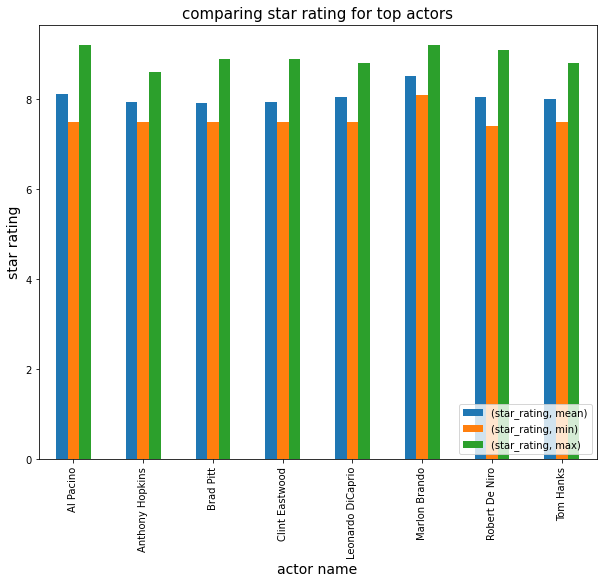

In [752]:
act=[ 'Al Pacino', 'Marlon Brando', 'Robert De Niro', 'Clint Eastwood', 'Brad Pitt',
        'Leonardo DiCaprio', 'Tom Hanks', 'Anthony Hopkins']
lst1=[]
lst2=[]
len_of_df=len(movies.index)
for x in act:
    for i in range(len_of_df):
        if x in movies.loc[i,'actors_list']:       # filters the actors names based on the list of the top actors 
            lst1.append(x)                         #puts the result in a list
            u=movies.loc[i, 'star_rating']          # makes the second list for the star rating values for each actor
            lst2.append(u)
df_movies_actors= pd.DataFrame(list(zip(lst1, lst2)), columns =['actor_name', 'star_rating']) #makes a df from two lists!
df=df_movies_actors.groupby('actor_name').agg(['mean', 'min', 'max'])
#df2=df_movies_actors.groupby('actor_name').max()
print(df)
df=df.plot(kind='bar', figsize=(10,8));
plt.xlabel('actor name',fontsize=14);
plt.ylabel('star rating',fontsize=14);
df.set_title('comparing star rating for top actors', fontsize=15, y=1);
df.legend(loc=4);

The mean, max and min values of star rating for those movies including one of the top actors are compared. 
The results shows Marlon Brando has acheived the highest average value of star_rating and at the same time one of the maximum star ratings. In addition, the bar charts show he has aceheived the greatest minimum star_rating. Al Pacino is the next, with reaching the same maximum of star_rating as Marlon Brando.
In general the average and minimum star_rating for the top actors are 7% and 16% higher than their corresponding values for whole the movies.
